# SEPSIS PREDICTION

## GROUP MEMBERS
### Amrutha C - 23PGAI0030
### Gajendra Muley - 23PGAI0048
### Neha Rupesh Thakur - 23PGAI0064
### NENCY BADIYANI - 23PGAI0018


## Importing Libraries 

In [102]:
# !pip install tensorflow
import pandas as pd
import csv 

import sklearn

!pip install xgboost
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import precision_score, accuracy_score, recall_score, \
average_precision_score, precision_recall_curve, confusion_matrix
from subprocess import call
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

# !pip install imblearn
from imblearn.over_sampling import SMOTE

from os import listdir

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
import statsmodels.api as sm

import missingno as msno

import seaborn as sns

import numpy as np

from pylab import rcParams

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

## Loading Data

In [4]:
training_a_new = sorted(listdir('/Users/nencybadiyani/Downloads/PGP AI-DS/Quarter-2/ML/training_setA/training/'))
len(training_a_new)

20336

In [5]:
df_new_final=pd.DataFrame()

In [8]:
with open("sepsis_data.psv", "wb") as fout:
    
    for i, csv in enumerate(training_a_new):
        if i == 0:
            with open('/Users/nencybadiyani/Downloads/PGP AI-DS/Quarter-2/ML/training_setA/training/' + csv, "rb") as f:
#                 print(f.name)
#                 fout.write(f.read())
                
                df = pd.read_csv(f.name, sep="|")
                df['psv_id'] = i+1
                df_new_final = pd.concat([df_new_final, df])
      # now the rest:    
        with open('/Users/nencybadiyani/Downloads/PGP AI-DS/Quarter-2/ML/training_setA/training/' + csv, "rb") as f:
            next(f) 
#             fout.write(f.read())
            
            df = pd.read_csv(f.name, sep="|")
            df['psv_id'] = i+1
            df_new_final = pd.concat([df_new_final, df])

In [158]:
dataA_new=df_new_final

## Checking data type  and shape

In [159]:
dataA_new.shape

(790269, 42)

In [160]:
dataA_new.dtypes

HR                  float64
O2Sat               float64
Temp                float64
SBP                 float64
MAP                 float64
DBP                 float64
Resp                float64
EtCO2               float64
BaseExcess          float64
HCO3                float64
FiO2                float64
pH                  float64
PaCO2               float64
SaO2                float64
AST                 float64
BUN                 float64
Alkalinephos        float64
Calcium             float64
Chloride            float64
Creatinine          float64
Bilirubin_direct    float64
Glucose             float64
Lactate             float64
Magnesium           float64
Phosphate           float64
Potassium           float64
Bilirubin_total     float64
TroponinI           float64
Hct                 float64
Hgb                 float64
PTT                 float64
WBC                 float64
Fibrinogen          float64
Platelets           float64
Age                 float64
Gender              

### All values are of type integers and floats , there are no object datatype in data 

## Checking ratio of patient with and without sepsis  

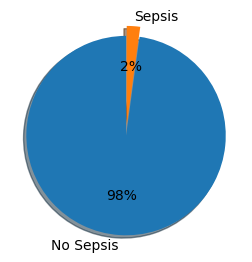

In [161]:
df = dataA_new['SepsisLabel'].value_counts()


no_sepsis_percent = (df[0]/(df[0]+df[1]))*100
sepsis_percent = (df[1]/(df[0]+df[1]))*100

labels = 'No Sepsis', 'Sepsis'
sizes = [no_sepsis_percent, sepsis_percent]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.0f%%', shadow=True, startangle = 90)
ax1.axis('equal')


plt.show()

## Checking for Missing value

In [172]:
def missing_values(df):
    missing_data_new = df.isnull().sum()
    missing_percent = (missing_data_new/df.shape[0])*100
    msno.bar(df)
    return missing_percent

HR                    7.743439
O2Sat                12.032485
Temp                 66.225298
SBP                  15.211656
MAP                  10.233224
DBP                  48.129308
Resp                  9.776671
EtCO2               100.000000
BaseExcess           89.574689
HCO3                 91.949703
FiO2                 85.807491
pH                   88.532765
PaCO2                91.231593
SaO2                 95.044219
AST                  98.504180
BUN                  91.841006
Alkalinephos         98.540624
Calcium              95.024479
Chloride             91.676379
Creatinine           93.358084
Bilirubin_direct     99.850431
Glucose              87.768975
Lactate              96.565347
Magnesium            92.219991
Phosphate            94.951339
Potassium            89.138129
Bilirubin_total      98.773329
TroponinI            99.877890
Hct                  88.224263
Hgb                  91.164654
PTT                  95.152790
WBC                  92.489899
Fibrinog

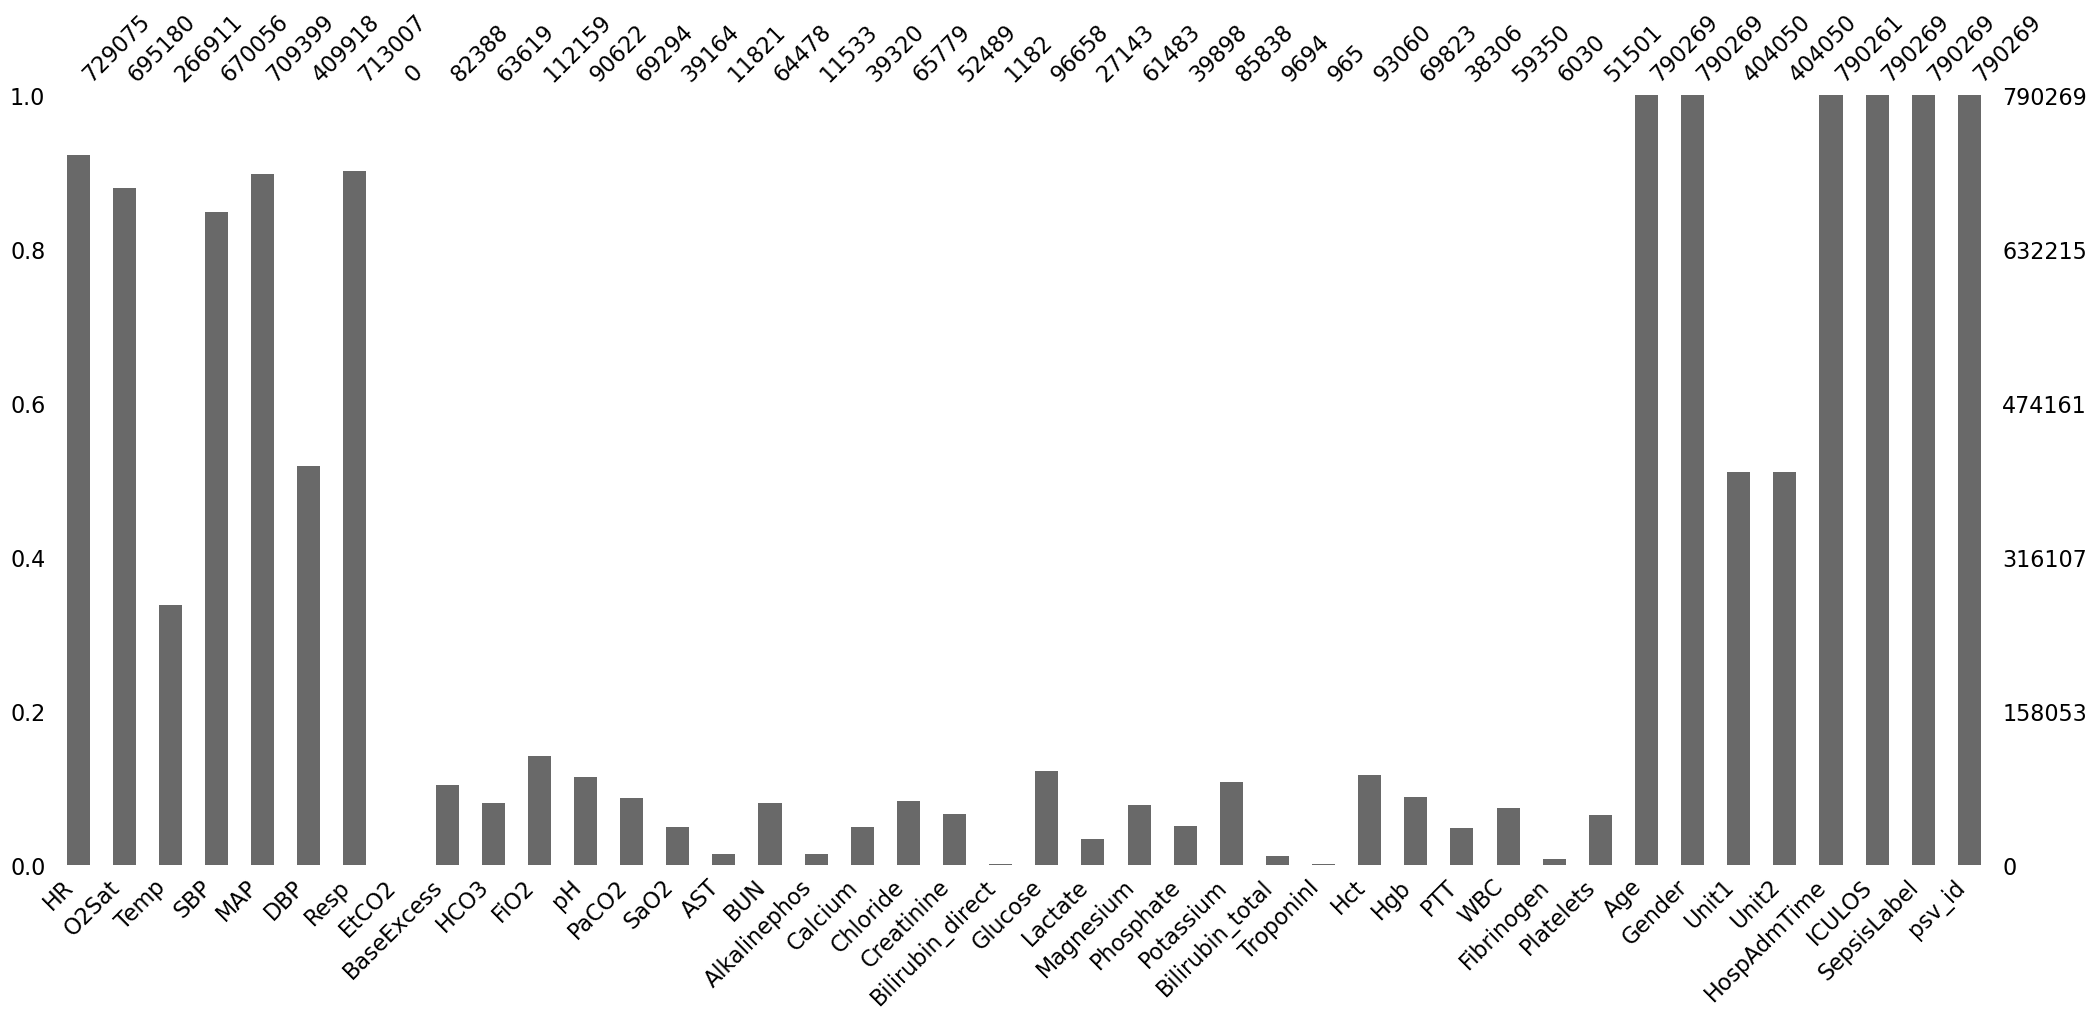

In [173]:
missing_values(dataA_new)

## Checking for correlation 

In [174]:
def correlation_data(df):
    fig = plt.figure(figsize=(12,12))
    corr = df.corr()
    ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
    )
    ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
    );
    dict_columns={}
    # Calculate the pairwise correlations between columns
    corr_matrix = df.corr(method='pearson',min_periods=2)
    corr_matrix = corr_matrix.mask(np.tril(np.ones(corr_matrix.shape)).astype(np.bool))


    # Iterate over the columns of the dataframe
    for col in df.columns:

      # Find the correlation of this column with all other columns
        col_corrs = corr_matrix[col]

      # Select the correlations that are greater than 80%
        strong_corrs = col_corrs[abs(col_corrs) > 0.75]
        if len(strong_corrs) != 0: 

      # Print the name of the column and the strong correlations
            print(f'Column {col}:')
            print(strong_corrs)
            print()
            dict_columns[col]=[strong_corrs]
    return dict_columns

Column MAP:
SBP    0.77376
Name: MAP, dtype: float64

Column DBP:
MAP    0.802643
Name: DBP, dtype: float64

Column HCO3:
BaseExcess    0.854997
Name: HCO3, dtype: float64

Column Bilirubin_total:
Bilirubin_direct    0.962073
Name: Bilirubin_total, dtype: float64

Column Hgb:
Hct    0.961995
Name: Hgb, dtype: float64

Column Unit2:
Unit1   -1.0
Name: Unit2, dtype: float64



{'MAP': [SBP    0.77376
  Name: MAP, dtype: float64],
 'DBP': [MAP    0.802643
  Name: DBP, dtype: float64],
 'HCO3': [BaseExcess    0.854997
  Name: HCO3, dtype: float64],
 'Bilirubin_total': [Bilirubin_direct    0.962073
  Name: Bilirubin_total, dtype: float64],
 'Hgb': [Hct    0.961995
  Name: Hgb, dtype: float64],
 'Unit2': [Unit1   -1.0
  Name: Unit2, dtype: float64]}

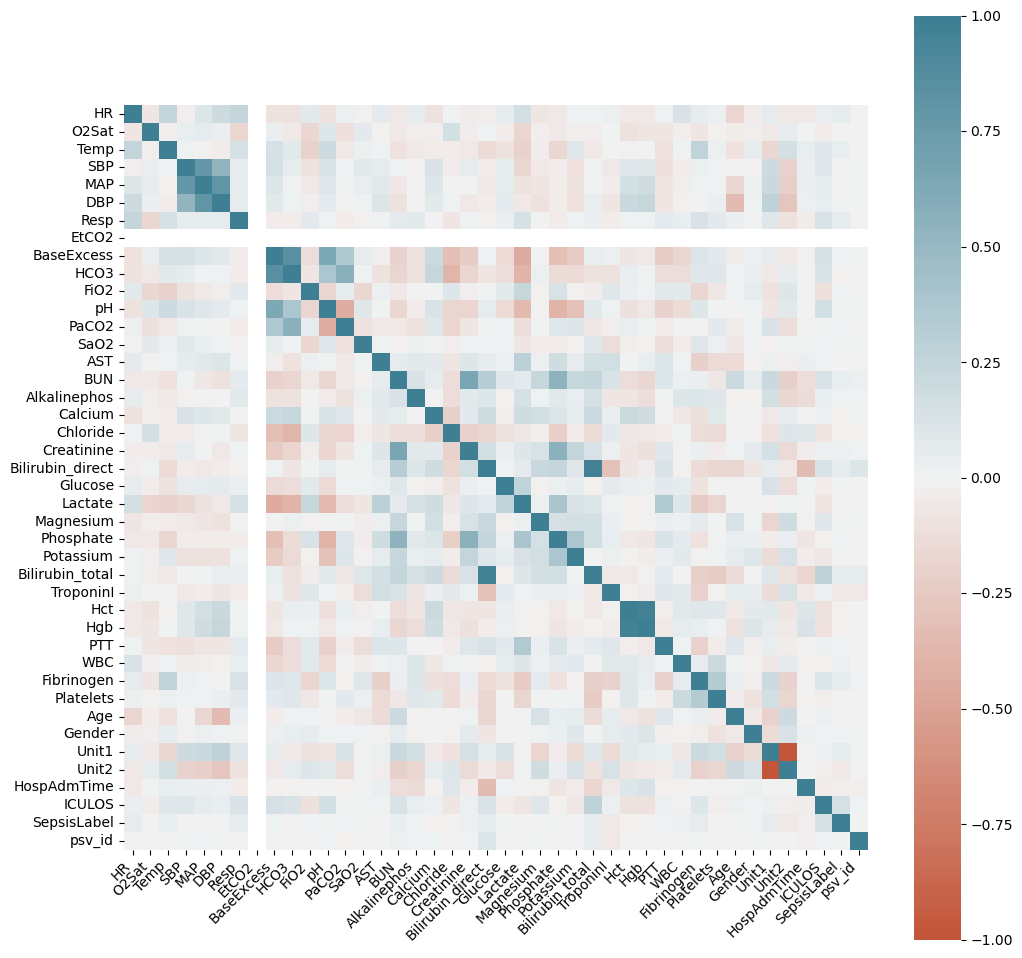

In [175]:
correlation_data(dataA_new)

## Dropping columns with high correlation and high % of missing values and column with 100% Null values

In [213]:
data_new = dataA_new.drop(columns=['Bilirubin_direct','Unit2','Hgb','HCO3','DBP','EtCO2'])

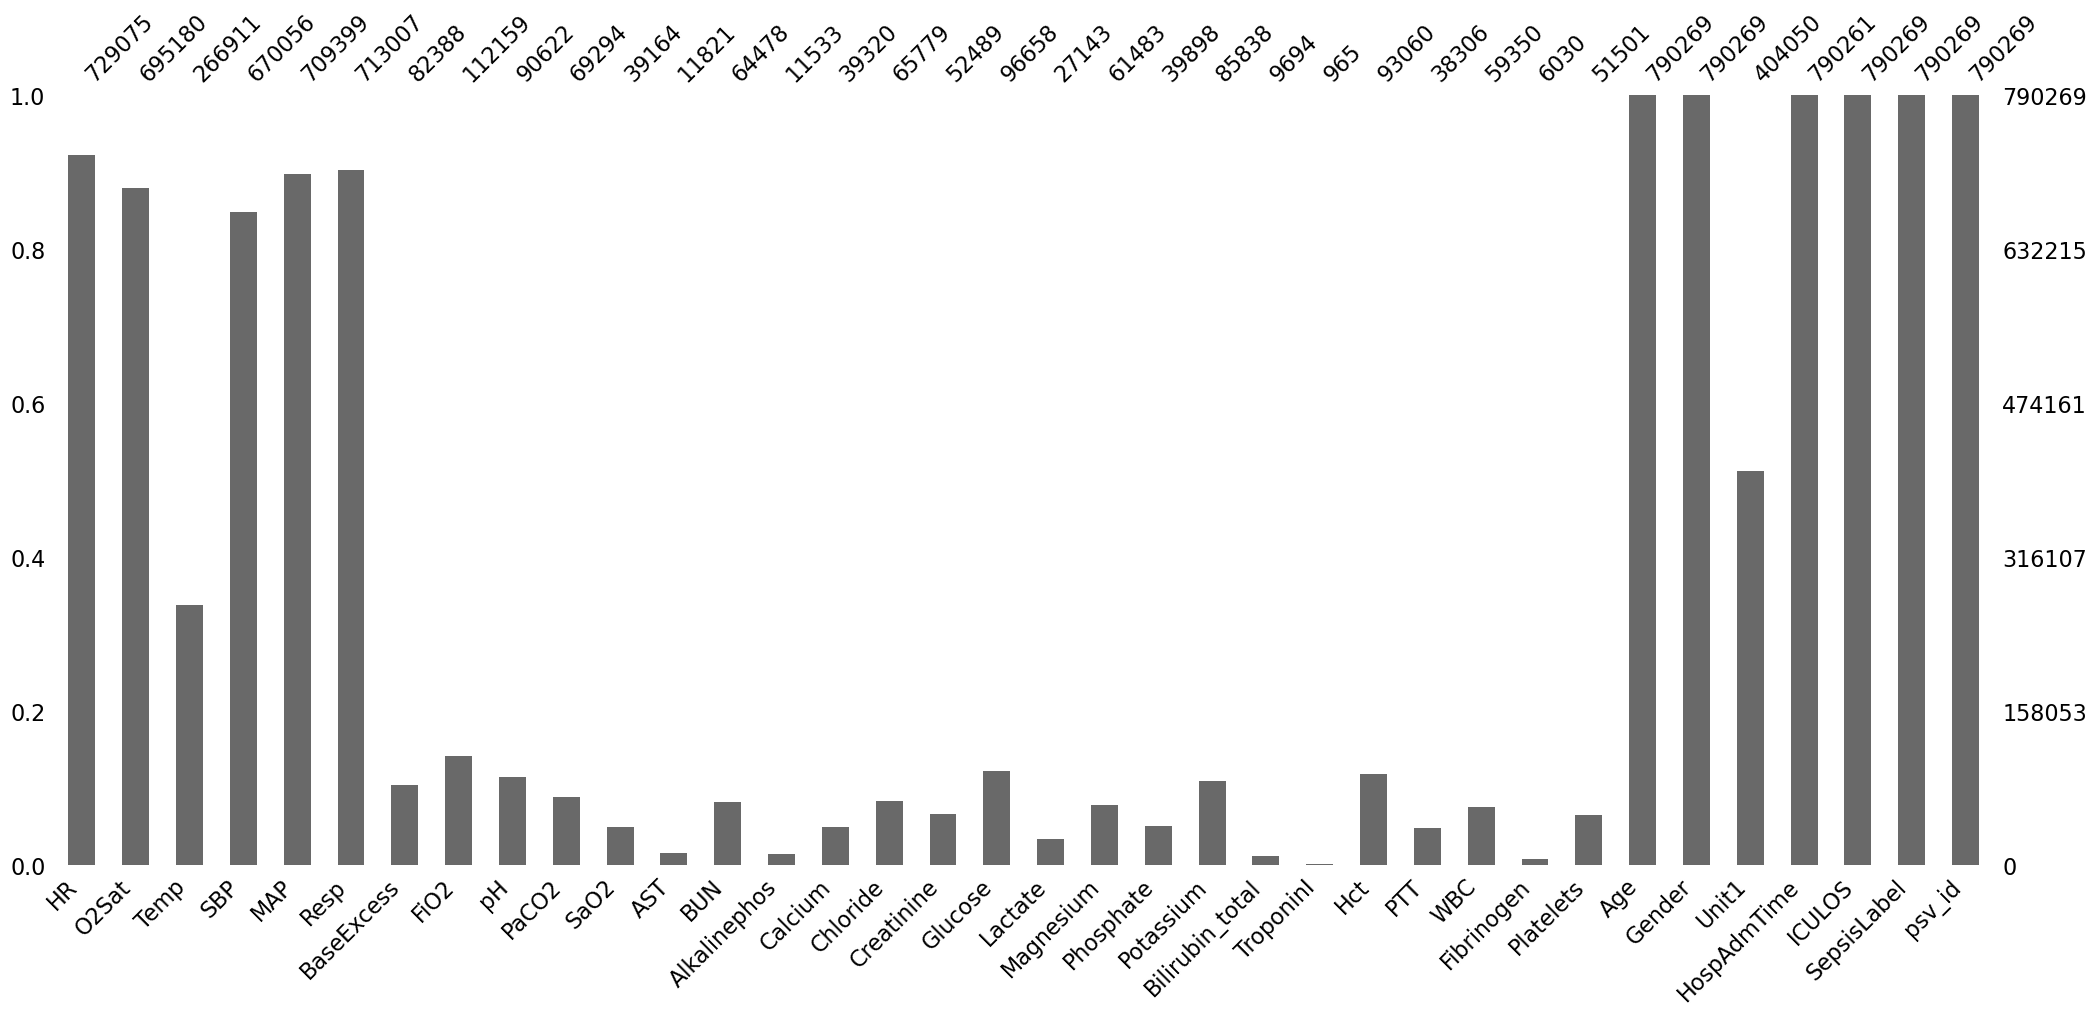

In [214]:
missing_value=missing_values(data_new)

## Checking Distribution of removing Columns with missing value % more than 80 

In [215]:
def check_distribution(m,df):
    new_cols=list(m[m >80 ].index)
    rcParams['figure.figsize'] = 3, 3
    for i in new_cols:
        plt.figure(i)
        s=sns.distplot(df[i].dropna(), axlabel=i)
        figure=s.get_figure()
    


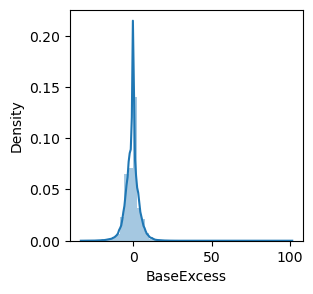

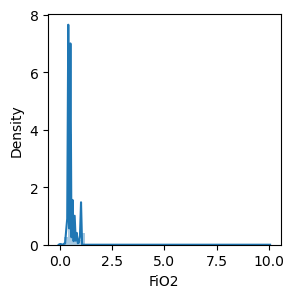

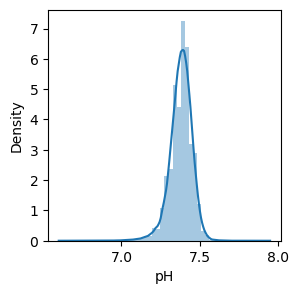

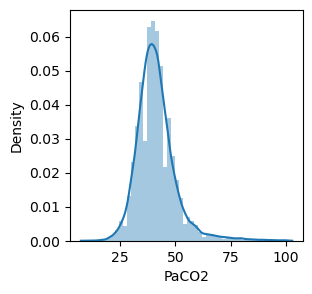

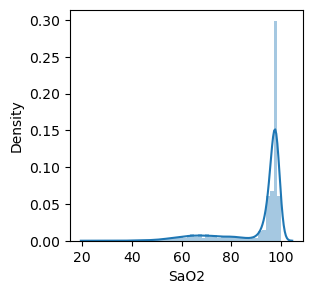

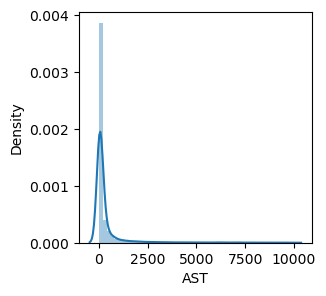

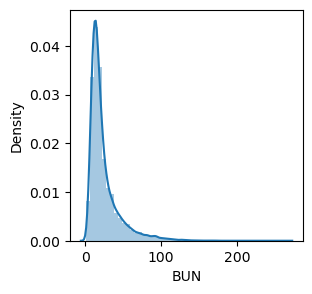

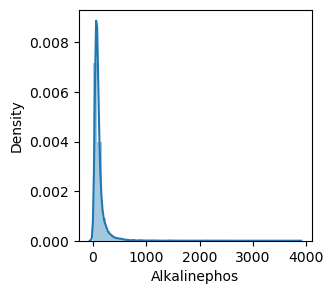

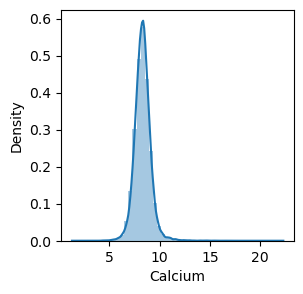

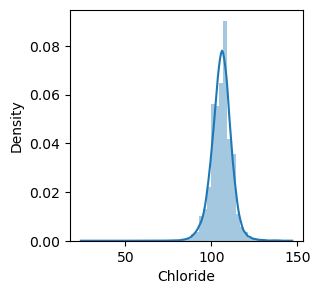

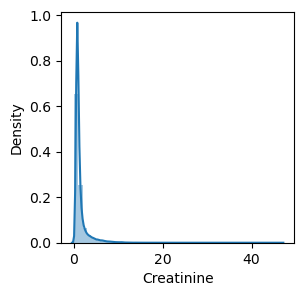

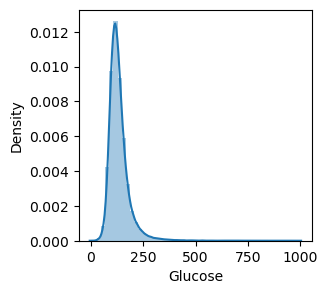

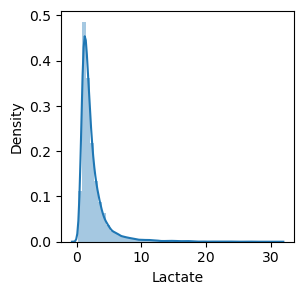

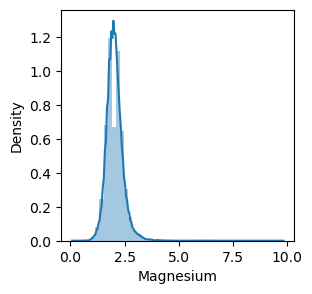

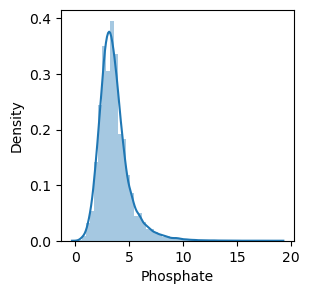

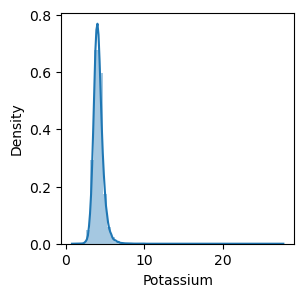

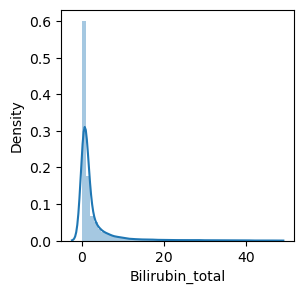

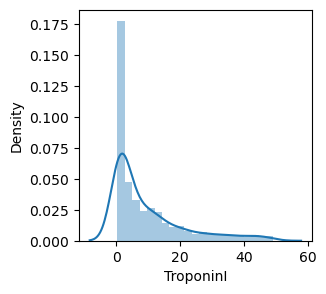

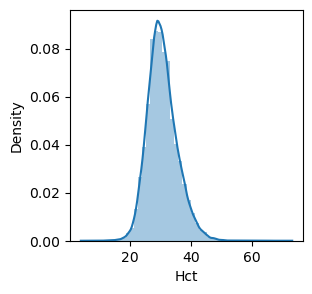

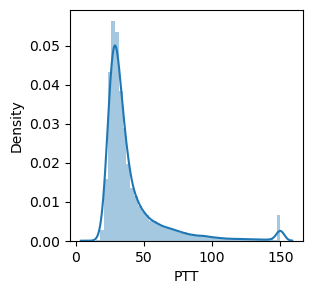

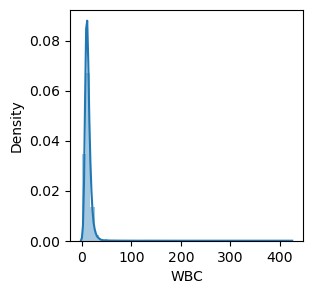

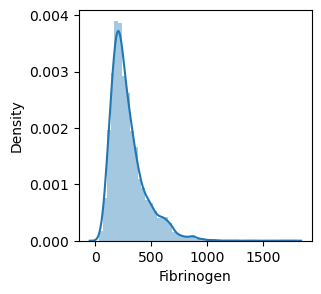

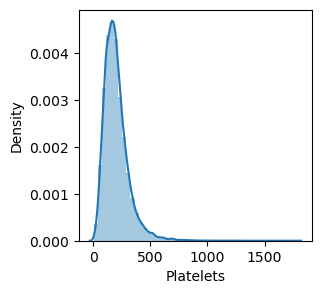

In [216]:
check_distribution(missing_value,data_new)

## Removing columns whos affect is lower on whole data based on distribution result  

In [217]:
data_new = data_new.drop(columns=['AST','Lactate','Alkalinephos','TroponinI','Fibrinogen','Magnesium','Chloride','Calcium','Potassium','BaseExcess','pH','Phosphate','BUN','PTT','Hct','Bilirubin_total'])

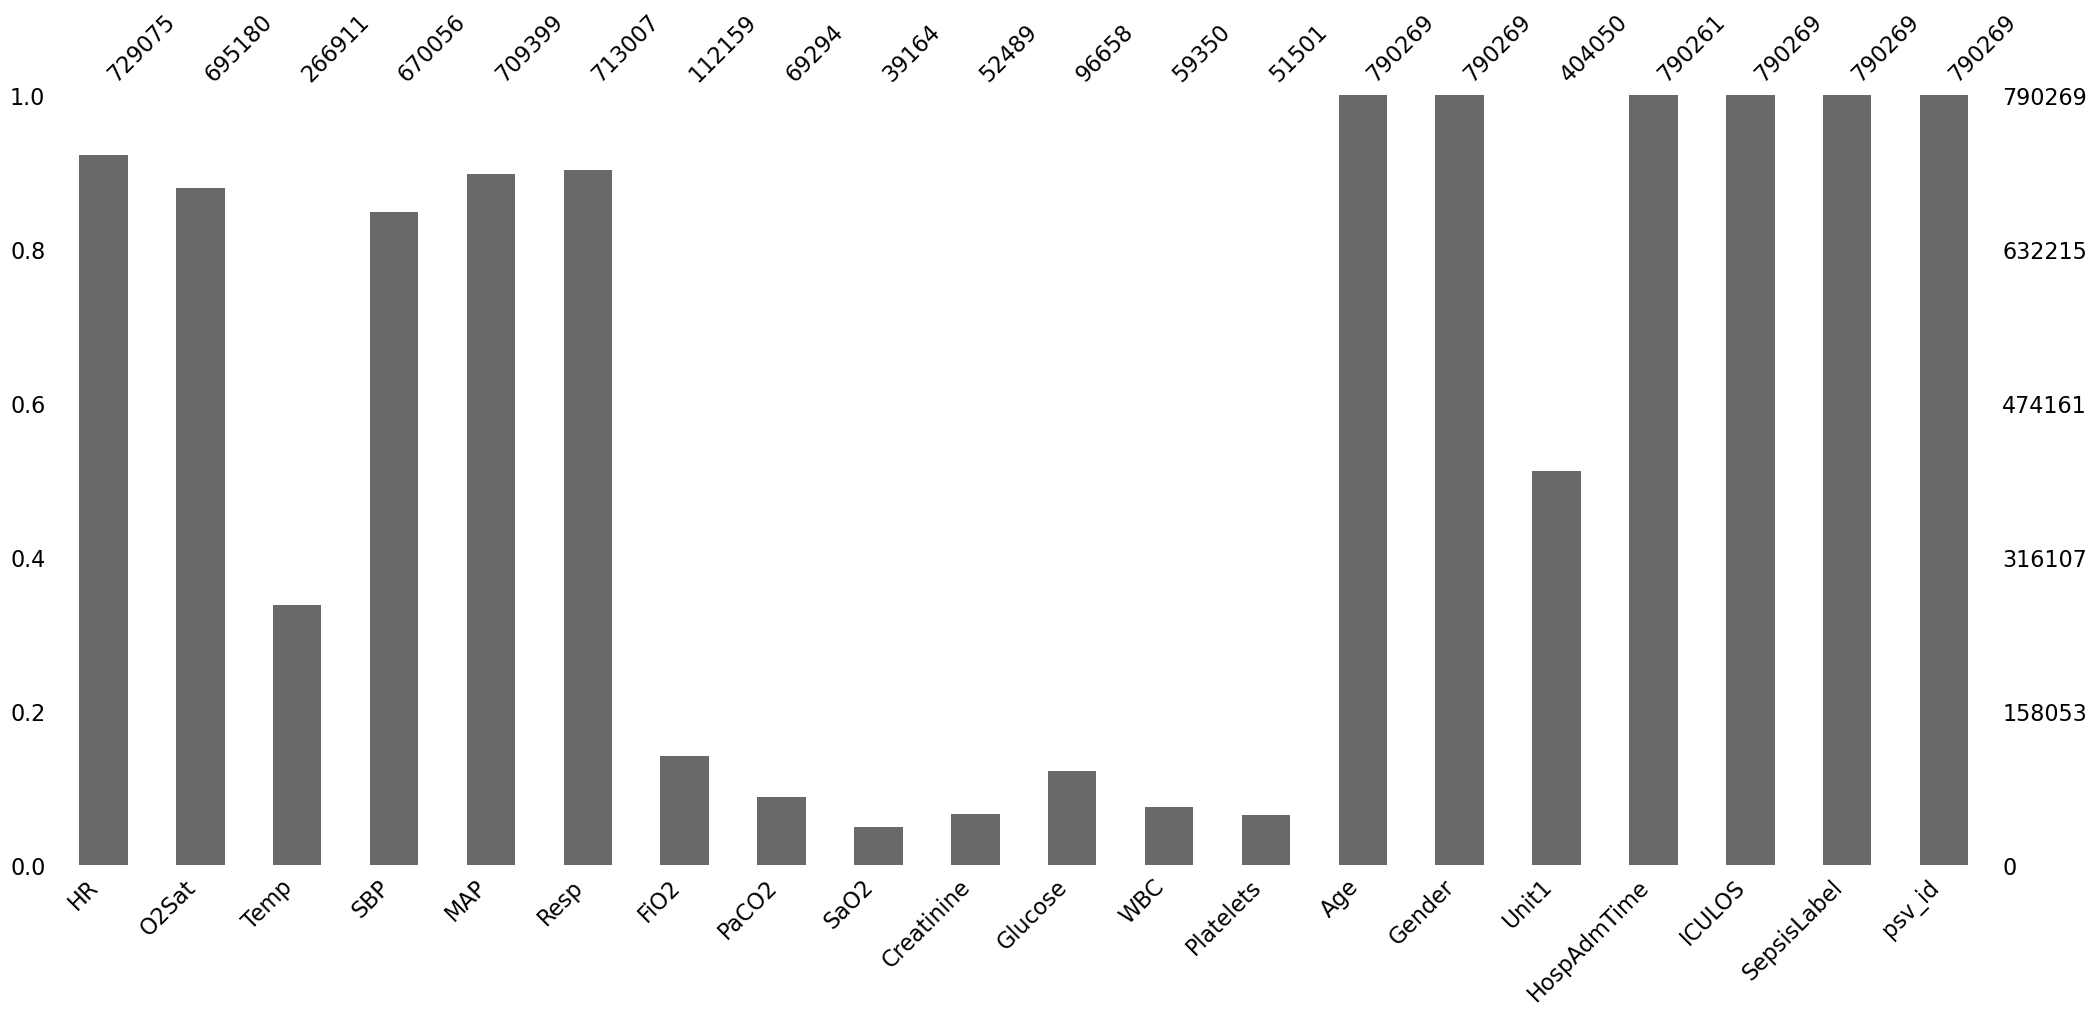

In [218]:
m=missing_values(data_new)

In [219]:
data_new.shape

(790269, 20)

## Mising Value Imputation

In [184]:
# def missing_value_imputation_less_50_backwardfill(df,less_50):
#     for i in less_50:
#         missing_rows = df[i].isnull()
#         df.where(~missing_rows, df[i].bfill(), axis=0,inplace=True)
        
    
    
    

In [185]:
# def missing_value_imputation_less_50_forwardfill(df,less_50):
#     for i in less_50:
#         missing_rows = df[i].isnull()
#         df.where(~missing_rows, df[i].ffill(), axis=0,inplace=True)

In [186]:
m

HR              7.743439
O2Sat          12.032485
Temp           66.225298
SBP            15.211656
MAP            10.233224
Resp            9.776671
FiO2           85.807491
PaCO2          91.231593
SaO2           95.044219
Creatinine     93.358084
Glucose        87.768975
WBC            92.489899
Platelets      93.483105
Age             0.000000
Gender          0.000000
Unit1          48.871840
HospAdmTime     0.001012
ICULOS          0.000000
SepsisLabel     0.000000
psv_id          0.000000
dtype: float64

In [187]:
# columns_50=['HR','O2Sat','SBP','MAP','Resp','Unit1']
# columns_66=['Temp','FiO2','PaCO2','SaO2','Creatinine','Glucose','WBC','Platelets']

In [188]:
# missing_value_imputation_less_50_backwardfill(data_new,columns_50)

In [189]:
# missing_value_imputation_less_50_forwardfill(data_new,columns_50)

In [222]:
grouped = data_new.groupby('psv_id')
def impute_median(series):
    return series.fillna(series.median())
for i in data_new.columns:
    print(grouped[i])
    data_new['imputed_column'] = grouped[i].transform(impute_median)
    data_new[i].fillna(data_new['imputed_column'], inplace=True)
    data_new.drop('imputed_column', axis=1, inplace=True)
    

HR              0.001139
O2Sat           0.026700
Temp            0.853633
SBP             1.261722
MAP             0.003037
Resp            0.088704
FiO2           36.193119
PaCO2          32.836794
SaO2           57.278977
Creatinine      1.029396
Glucose         0.940566
WBC             1.511890
Platelets       1.394715
Age             0.000000
Gender          0.000000
Unit1          48.871840
HospAdmTime     0.001012
ICULOS          0.000000
SepsisLabel     0.000000
psv_id          0.000000
dtype: float64

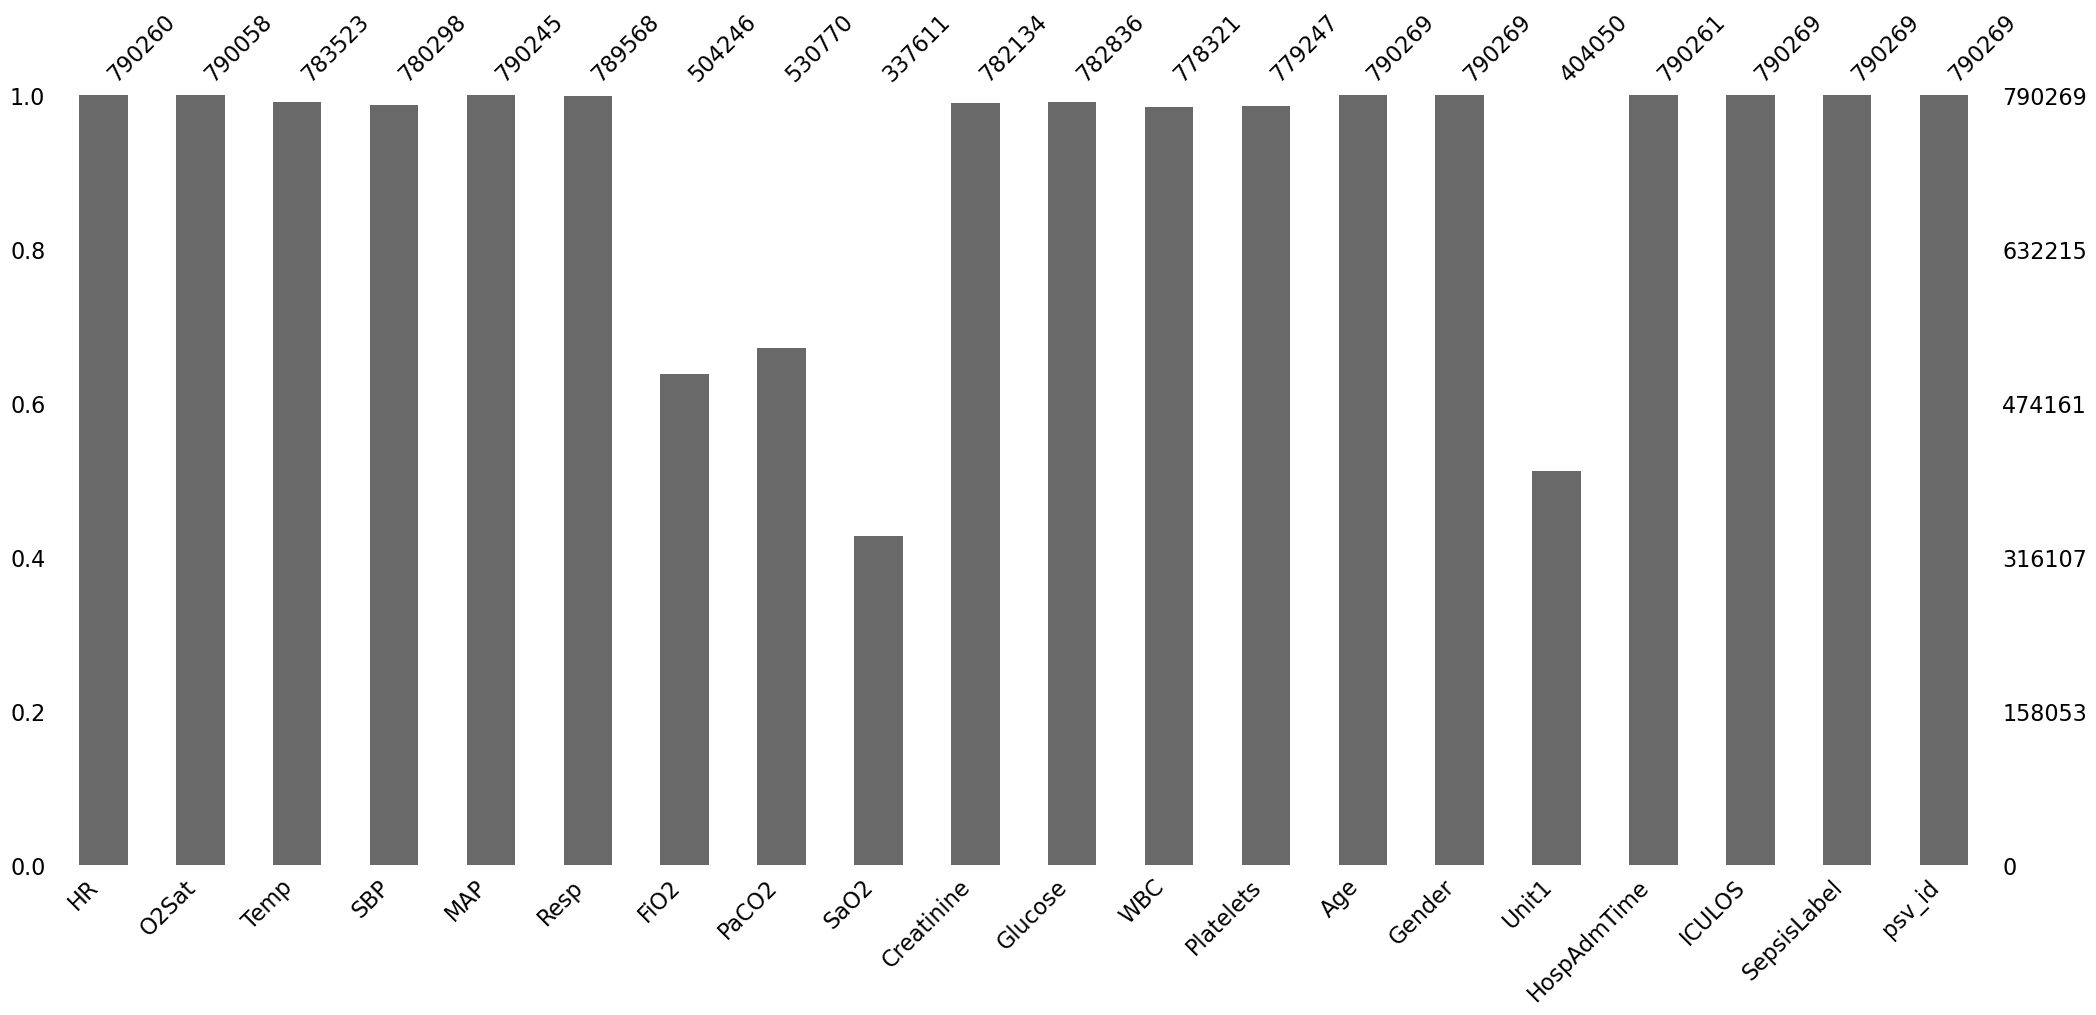

In [223]:
missing_values(data_new)

In [224]:
for i in data_new.columns:
    median = data_new[i].median()
    data_new[i].fillna(median,inplace=True)

HR             0.0
O2Sat          0.0
Temp           0.0
SBP            0.0
MAP            0.0
Resp           0.0
FiO2           0.0
PaCO2          0.0
SaO2           0.0
Creatinine     0.0
Glucose        0.0
WBC            0.0
Platelets      0.0
Age            0.0
Gender         0.0
Unit1          0.0
HospAdmTime    0.0
ICULOS         0.0
SepsisLabel    0.0
psv_id         0.0
dtype: float64

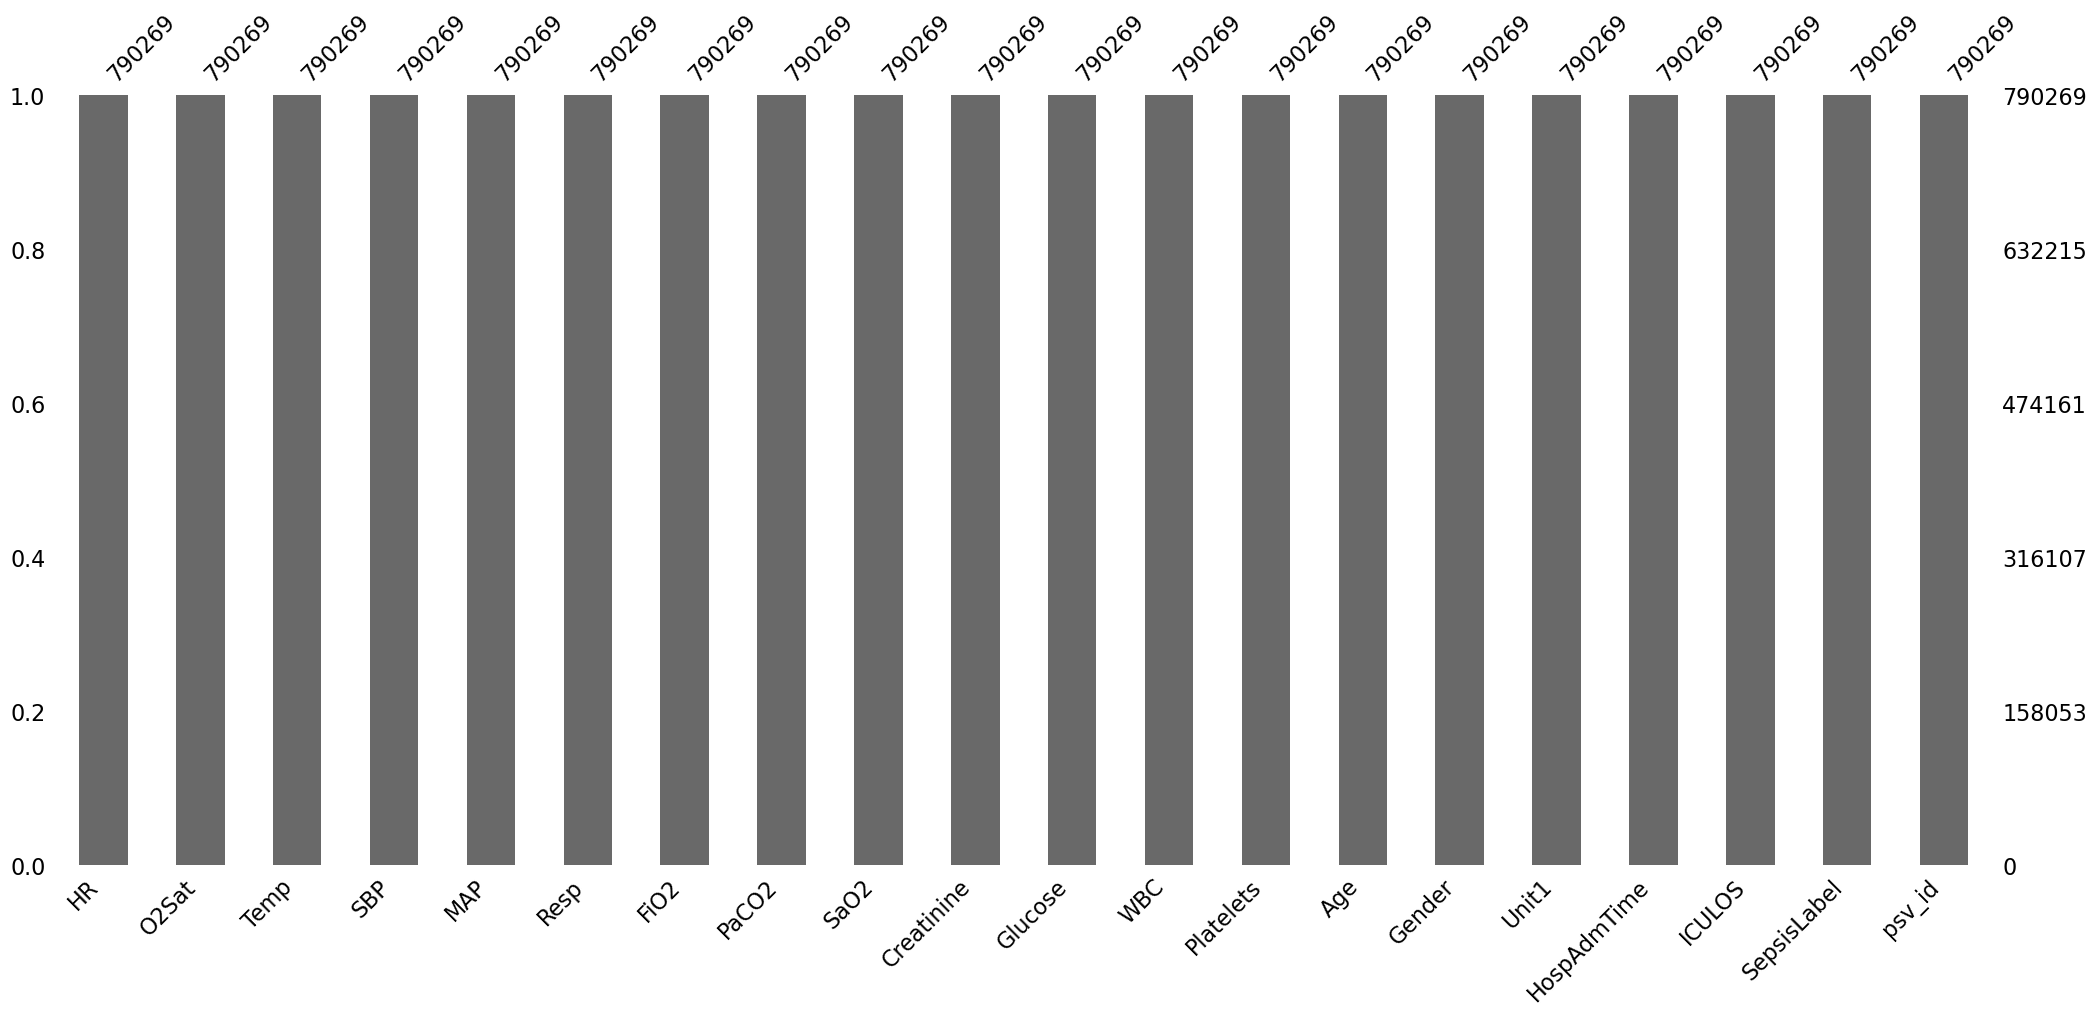

In [225]:
missing_values(data_new)

### Outliers Detection

In [99]:
def outlier_detection(df):
    for i in df.columns:
        plt.figure(i)
        
        s=sns.boxplot(df[i])
        figure=s.get_figure()
        

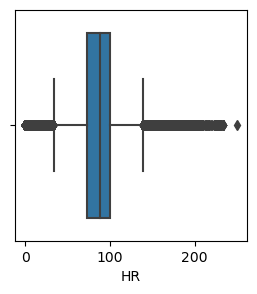

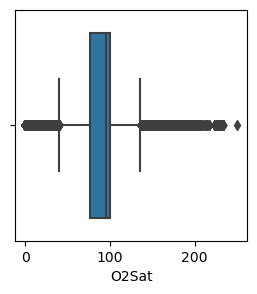

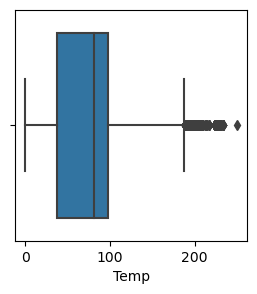

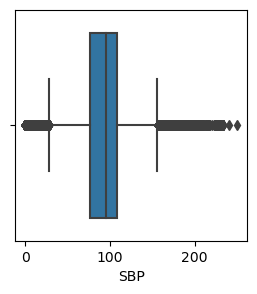

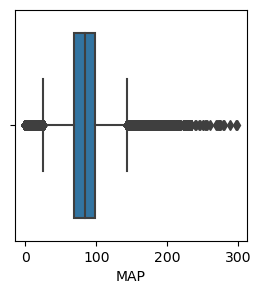

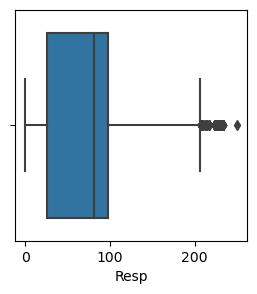

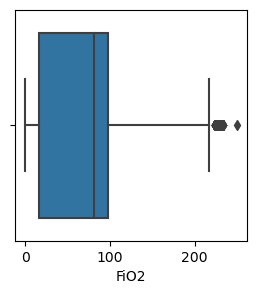

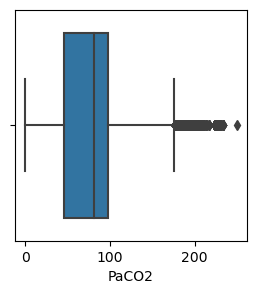

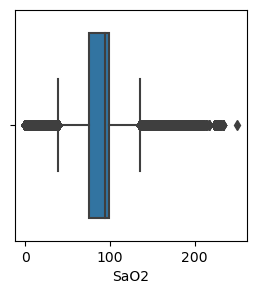

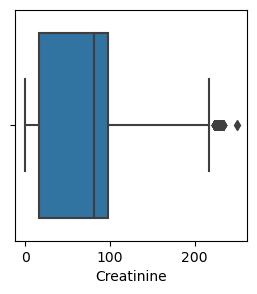

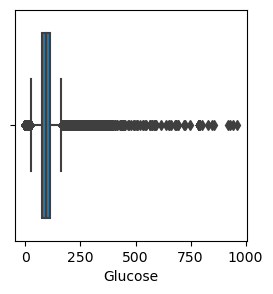

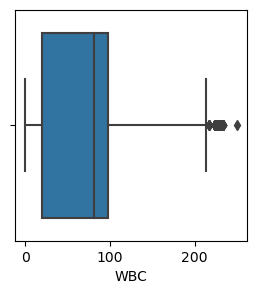

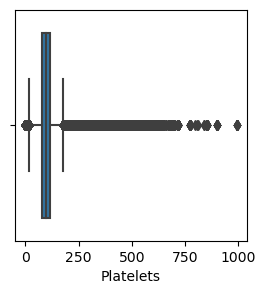

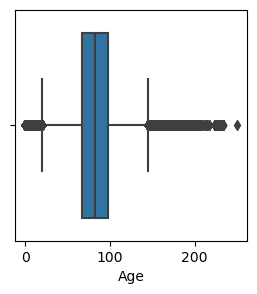

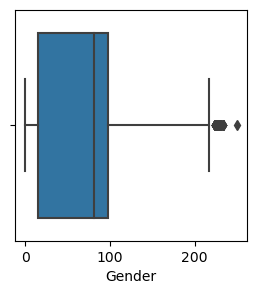

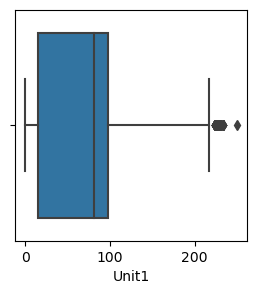

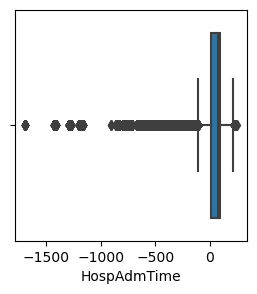

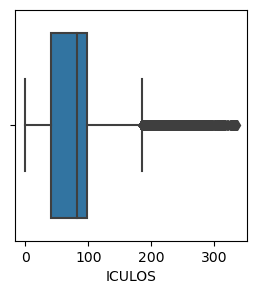

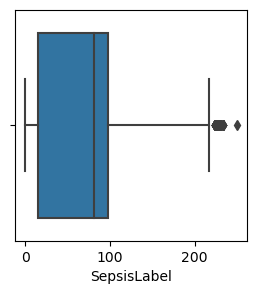

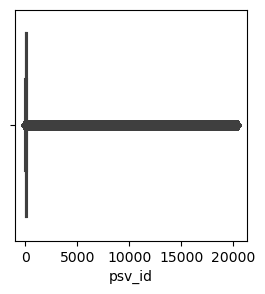

In [100]:
outlier_detection(data_new)

### outliers are detected . based on research , In medical data outlier removal is not much helpful 

## SOFA and qSOFA score calulation

In [226]:
data_new.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'Resp', 'FiO2', 'PaCO2', 'SaO2',
       'Creatinine', 'Glucose', 'WBC', 'Platelets', 'Age', 'Gender', 'Unit1',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'psv_id'],
      dtype='object')

In [227]:
def Platelets_cnt(value):
    if value < 20:
        return 4
    if 20 <= value < 50:
        return 3
    elif 50 <= value < 100:
        return 2
    elif 100 <= value < 150:
        return 1
    elif value >= 150:
        return 0
data_new['Platelets_score'] = data_new['Platelets'].map(Platelets_cnt)
data_new['Platelets_score']

0     0
1     0
2     0
3     0
4     0
     ..
28    0
29    0
30    0
31    0
32    0
Name: Platelets_score, Length: 790269, dtype: int64

In [228]:
# def Bilirubin_cnt(value):
#     if value < 1.2:
#         return 0
#     if 1.2 <= value < 2:
#         return 1
#     elif 2.0 <= value < 6:
#         return 2
#     elif 6 <= value < 12:
#         return 3
#     elif value >= 12:
#         return 4
# data_new['Bilirubin_score'] = data_new['Bilirubin_total'].map(Bilirubin_cnt)
# data_new['Bilirubin_score']

In [229]:
def Creatinine_cnt(value):
    if value < 1.2:
        return 0
    if 1.2 <= value < 2:
        return 1
    elif 2.0 <= value < 3.5:
        return 2
    elif 3.5 <= value < 5:
        return 3
    elif value >= 5:
        return 4
    
data_new['Creatinine_score'] = data_new['Creatinine'].map(Creatinine_cnt)
data_new['Creatinine_score'].unique()

array([0, 2, 3, 1, 4])

In [230]:
def Resp_cnt(value):
    if value < 22:
        return 0
    else:
        return 1

data_new['Resp_score']=data_new['Resp'].map(Resp_cnt)

In [231]:
def SBP_cnt(value):
    if value <= 100:
        return 1
    else:
        return 0

data_new['SBP_score']=data_new['SBP'].map(SBP_cnt)

In [232]:
def FiO2_cnt(value):
    if value < 0.21:
        return 0
    elif 0.21 <=value <=.50 :
        return 1
    else:
        return 2
    
    

data_new['FiO2_score']=data_new['FiO2'].map(FiO2_cnt)
data_new['FiO2_score'].unique()

array([1, 2, 0])

In [233]:
def MAP_cnt(value):
    if value<70:
        return 1 
    else:
        return 0
data_new['MAP_score']=data_new['MAP'].map(MAP_cnt)
data_new['MAP_score'].unique()

array([0, 1])

In [234]:
data_new['SOFA_score']=data_new['MAP_score']+data_new['FiO2_score']+data_new['Creatinine_score']+data_new['Platelets_score']

In [235]:
data_new['qSOFA']=data_new['SBP_score']+data_new['Resp_score']
data_new['qSOFA'].unique()

array([1, 2, 0])

In [236]:
data_new.drop(columns=['MAP_score','Resp_score','FiO2_score','Creatinine_score','Platelets_score','SBP_score','psv_id'],inplace=True)

In [237]:
data_new.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'Resp', 'FiO2', 'PaCO2', 'SaO2',
       'Creatinine', 'Glucose', 'WBC', 'Platelets', 'Age', 'Gender', 'Unit1',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'SOFA_score', 'qSOFA'],
      dtype='object')

### We tried to calculate SOFA and qSOFA score based on Sepsis dataset , for these scoring we consider only few required columns with less missing values 

## Splitting In test and train data

In [238]:
features=['O2Sat', 'Temp', 'SBP', 'MAP', 'Resp', 'PaCO2', 'SaO2', 'Creatinine',
       'Glucose', 'WBC', 'Platelets', 'Age',
       'Gender', 'Unit1', 'HospAdmTime', 'ICULOS',
       'HR', 'qSOFA', 'SOFA_score']
feature_df=data_new[features]

In [239]:
target=['SepsisLabel']
target_df=data_new[target]

In [240]:
X_train, X_test, y_train, y_test = train_test_split(feature_df, target_df, test_size=0.3, random_state=1729)

## Balancing data

In [241]:
data_new

,HR,O2Sat,Temp,SBP,MAP,Resp,FiO2,PaCO2,SaO2,Creatinine,...,WBC,Platelets,Age,Gender,Unit1,HospAdmTime,ICULOS,SepsisLabel,SOFA_score,qSOFA
0,104.0,91.0,36.725,128.0,87.915,25.0,0.29,98.0,88.5,0.7,...,10.20,327.5,83.14,0,1.0,-0.03,1,0,1,1
1,97.0,95.0,36.725,98.0,75.330,19.0,0.29,98.0,88.5,0.7,...,10.20,327.5,83.14,0,1.0,-0.03,2,0,1,1
2,89.0,99.0,36.725,122.0,86.000,22.0,0.29,98.0,88.5,0.7,...,10.20,327.5,83.14,0,1.0,-0.03,3,0,1,1
3,90.0,95.0,36.725,128.0,87.915,30.0,0.29,100.0,88.5,0.7,...,10.20,327.5,83.14,0,1.0,-0.03,4,0,1,1
4,103.0,88.5,36.725,122.0,91.330,24.5,0.28,98.0,88.5,0.7,...,10.20,327.5,83.14,0,1.0,-0.03,5,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,88.0,98.0,38.440,135.0,81.000,16.0,0.50,41.0,98.0,2.2,...,13.95,325.5,62.29,1,1.0,-0.03,31,1,3,0
29,96.0,98.0,38.720,174.0,97.000,16.0,0.50,34.0,97.0,2.5,...,13.95,325.5,62.29,1,1.0,-0.03,32,1,3,0
30,140.0,97.0,38.440,133.0,81.500,16.0,0.50,41.0,98.0,2.2,...,13.95,325.5,62.29,1,1.0,-0.03,33,1,3,0
31,120.0,96.0,38.440,154.0,118.000,16.0,0.50,41.0,98.0,2.2,...,13.95,325.5,62.29,1,1.0,-0.03,34,1,3,0


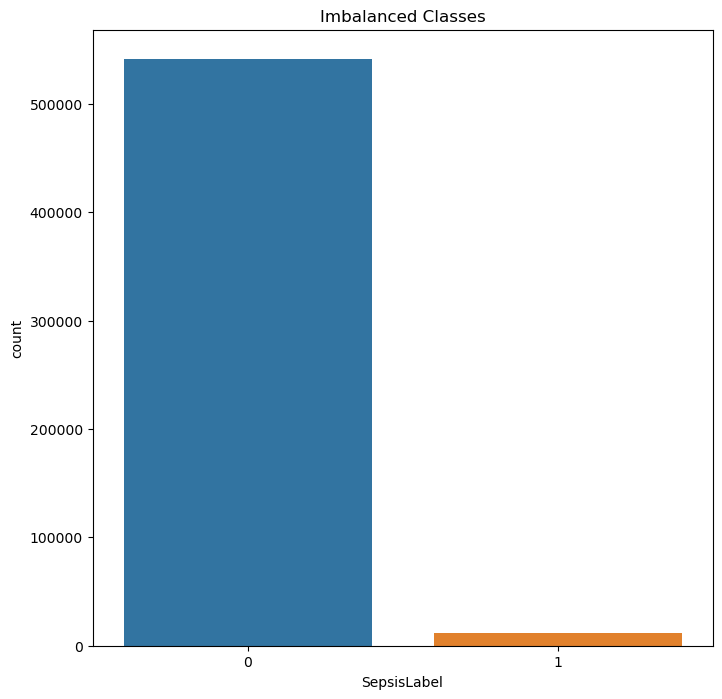

In [242]:
plt.figure(figsize=(8, 8))
sns.countplot(x='SepsisLabel', data=y_train)
plt.title('Imbalanced Classes')
plt.show()

In [243]:
sm = SMOTE(random_state=2)
X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
X_train_oversampled = pd.DataFrame(X_train_oversampled, columns=X_train.columns)
oversampled_train = pd.concat([pd.DataFrame(y_train_oversampled), pd.DataFrame(X_train_oversampled)], axis=1)


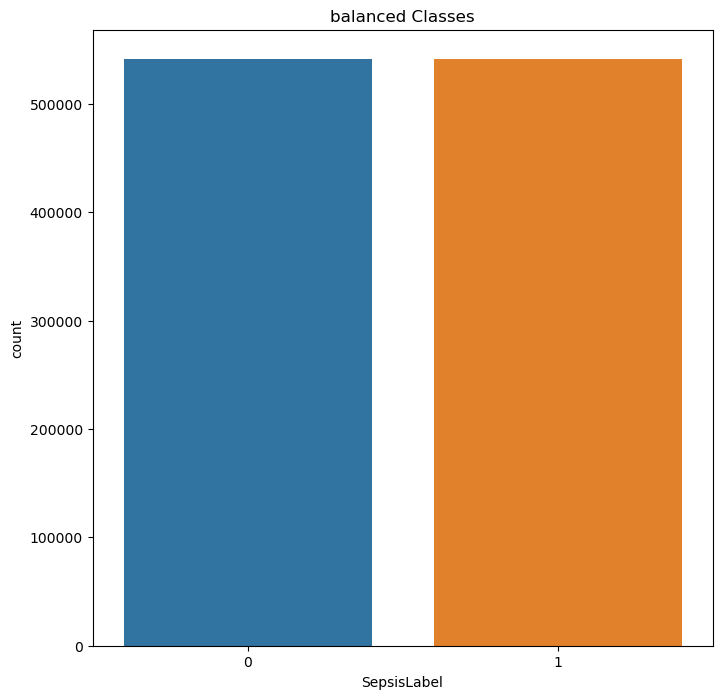

In [244]:
plt.figure(figsize=(8, 8))
sns.countplot(x='SepsisLabel', data=oversampled_train)
plt.title('balanced Classes')
plt.show()

## standardization/normalization

In [245]:
X_train=scaler.fit_transform(X_train_oversampled)
X_test=scaler.transform(X_test)

## Fisher Discriminant

In [246]:
lda = LDA()
lda = lda.fit(X_train, y_train_oversampled)
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)
y_train_pred = lda.predict(X_train)
y_test_pred = lda.predict(X_test)

In [252]:
def evaluate_model(y_test,preds):
    accuracy = accuracy_score(y_test, preds)
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    recall_0 = sklearn.metrics.recall_score(y_test, preds, pos_label=0)
    recall_1 = sklearn.metrics.recall_score(y_test, preds, pos_label=1)
    return {'recall_0':recall_0 , 'recall_1':recall_1 , 'accuracy':accuracy}
    

## XGBoost

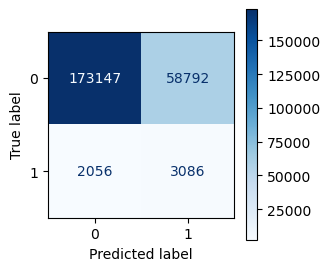

In [253]:
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train_lda, y_train_oversampled)
predicted_xg = xgb_cl.predict(X_test_lda)

ans_xg = evaluate_model(y_test,predicted_xg)


In [254]:
print(ans_xg)

{'recall_0': 0.7465195590219842, 'recall_1': 0.6001555814858032, 'accuracy': 0.743345101463213}


## Decision Tree

{'recall_0': 0.6136268587861463, 'recall_1': 0.5766238817580708, 'accuracy': 0.6128243089914417}


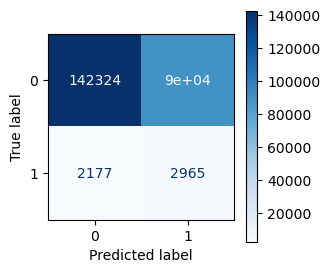

In [255]:
dtree = DecisionTreeClassifier(random_state=0)
dtree_model=dtree.fit(X_train_lda, y_train_oversampled)
predicted_dt = dtree.predict(X_test_lda)
ans_dt = evaluate_model(y_test,predicted_dt)
print(ans_dt)

## Logistic Regression

{'recall_0': 0.7219570662976041, 'recall_1': 0.6248541423570595, 'accuracy': 0.7198510213808783}


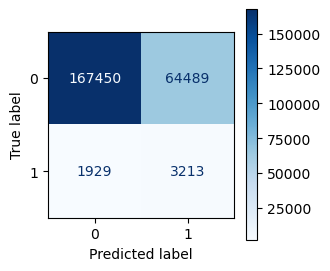

In [256]:
clf= LogisticRegression( C= 0.01, solver = 'lbfgs', dual=False)
log_reg_model=clf.fit(X_train_lda, y_train_oversampled)
predicted_lr = clf.predict(X_test_lda)
ans_lr = evaluate_model(y_test,predicted_lr)
print(ans_lr)

## Gaussian

{'recall_0': 0.8020125981400282, 'recall_1': 0.5367561260210035, 'accuracy': 0.7962595062447012}


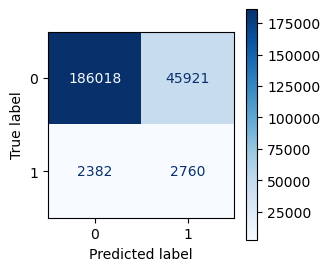

In [257]:
gnb = GaussianNB()
gnb_classifier = gnb.fit(X_train_lda, y_train_oversampled)
predicted_gnb = gnb_classifier.predict(X_test_lda)
ans_gnb = evaluate_model(y_test,predicted_gnb)
print(ans_gnb)

## Random Forest

{'recall_0': 0.6066293292632977, 'recall_1': 0.5845974329054843, 'accuracy': 0.6061514840919349}


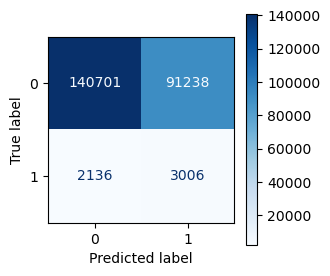

In [258]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_lda, y_train_oversampled)
predicted_rf = model.predict(X_test_lda)
ans_rf = evaluate_model(y_test,predicted_rf)
print(ans_rf)

## Adaboost


{'recall_0': 0.6066293292632977, 'recall_1': 0.5845974329054843, 'accuracy': 0.6061514840919349}


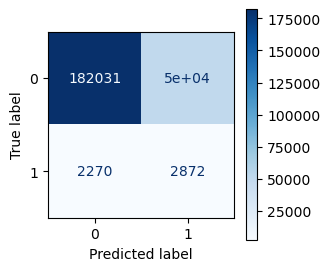

In [276]:
model_ada = AdaBoostClassifier(n_estimators=100, random_state=42)
model_ada.fit(X_train_lda, y_train_oversampled)
predicted_ab = model_ada.predict(X_test_lda)
ans_ab = evaluate_model(y_test,predicted_ab)
print(ans_rf)

### Summary for Traindata

### Recall is considered since in medical data true label prediction is important 
### Logistic Regression is giving good recall for sepsis true  , gaussian model is giving good recall for sepsis false and good accuracy but recall for sepsis true is comperatively less 

# 

# TESTING

## Loading Testing data

In [260]:
training_b = sorted(listdir('/Users/nencybadiyani/Downloads/PGP AI-DS/Quarter-2/ML/training_setB/'))
len(training_b)

20000

In [261]:
df_test_final=pd.DataFrame()

In [264]:
cnt=0

with open("test_sepsis_data.psv", "wb") as fout:
    
    for i, csv in enumerate(training_b):
        if i == 0:
            with open('/Users/nencybadiyani/Downloads/PGP AI-DS/Quarter-2/ML/training_setB/' + csv, "rb") as f:
#                 print(f.name)
                fout.write(f.read())
                cnt=cnt+1
                df = pd.read_csv(f.name, sep="|")
                df['psv_id'] = i+1
                df_test_final = pd.concat([df_test_final, df])
      # now the rest:    
        with open('/Users/nencybadiyani/Downloads/PGP AI-DS/Quarter-2/ML/training_setB/' + csv, "rb") as f:
            next(f) 
            fout.write(f.read())
            cnt=cnt+1
            df = pd.read_csv(f.name, sep="|")
            df['psv_id'] = i+1
            df_test_final = pd.concat([df_test_final, df])

In [265]:
df_test_final

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,psv_id
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,73,1,1.0,0.0,-214.64,1,0,1
1,93.0,92.5,NaN,110.0,76.0,56.0,22.0,NaN,NaN,NaN,...,NaN,NaN,73,1,1.0,0.0,-214.64,2,0,1
2,91.0,96.0,NaN,108.0,84.5,72.0,23.5,NaN,NaN,NaN,...,NaN,NaN,73,1,1.0,0.0,-214.64,3,0,1
3,93.0,98.0,NaN,123.0,87.0,61.0,21.0,NaN,NaN,NaN,...,NaN,NaN,73,1,1.0,0.0,-214.64,4,0,1
4,93.0,95.0,NaN,110.0,81.0,70.0,20.0,NaN,NaN,NaN,...,NaN,NaN,73,1,1.0,0.0,-214.64,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,80.0,96.0,NaN,115.0,87.0,65.0,15.0,NaN,NaN,NaN,...,NaN,NaN,62,0,NaN,NaN,0.00,31,0,20000
31,74.0,97.0,NaN,114.0,83.0,67.0,15.0,NaN,NaN,NaN,...,NaN,NaN,62,0,NaN,NaN,0.00,32,0,20000
32,78.0,98.0,NaN,110.0,83.0,69.0,15.0,NaN,NaN,NaN,...,NaN,NaN,62,0,NaN,NaN,0.00,33,0,20000
33,82.0,99.0,36.6,124.0,91.0,71.0,16.0,NaN,NaN,NaN,...,NaN,NaN,62,0,NaN,NaN,0.00,34,0,20000


## Applying same Preprocessing steps to Test data

In [266]:
# 'O2Sat', 'Temp', 'SBP', 'MAP', 'Resp', 'PaCO2', 'SaO2', 'Creatinine',
#        'Glucose', 'WBC', 'Platelets', 'Age',
#        'Gender', 'Unit1', 'HospAdmTime', 'ICULOS',
#        'HR', 'qSOFA', 'SOFA_score'

### Removing columns

In [280]:
data_test_new = df_test_final.drop(columns=['Bilirubin_direct','Lactate','Unit2','Hgb','HCO3','DBP','EtCO2','AST','Alkalinephos','TroponinI','Fibrinogen','Magnesium','Chloride','Calcium','Potassium','BaseExcess','pH','Phosphate','BUN','PTT','Hct','FiO2'])

In [281]:
data_test_new=data_test_new.drop(columns=['Bilirubin_total'])

In [282]:
data_test_new.shape

(762019, 19)

In [284]:
data_test_new.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'Resp', 'PaCO2', 'SaO2',
       'Creatinine', 'Glucose', 'WBC', 'Platelets', 'Age', 'Gender', 'Unit1',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'psv_id'],
      dtype='object')

In [286]:
columns=['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'Resp', 'PaCO2', 'SaO2',
       'Creatinine', 'Glucose', 'WBC', 'Platelets', 'Age', 'Gender', 'Unit1',
       'HospAdmTime', 'ICULOS', 'SepsisLabel']

### Imputing missing values

In [287]:
grouped_test = data_test_new.groupby('psv_id')
def impute_median(series):
    return series.fillna(series.median())
for i in columns:
    print(grouped[i])
    data_test_new['imputed_column'] = grouped_test[i].transform(impute_median)
    data_test_new[i].fillna(data_test_new['imputed_column'], inplace=True)
    data_test_new.drop('imputed_column', axis=1, inplace=True)

In [288]:
for i in data_test_new.columns:
    median = data_test_new[i].median()
    data_test_new[i].fillna(median,inplace=True)

## SOFA and qSOFA score

In [300]:
data_test_new['Platelets_score'] = data_test_new['Platelets'].map(Platelets_cnt)
data_test_new['Creatinine_score'] = data_test_new['Creatinine'].map(Creatinine_cnt)
data_test_new['Resp_score']=data_test_new['Resp'].map(Resp_cnt)
data_test_new['SBP_score']=data_test_new['SBP'].map(SBP_cnt)
#data_test_new['FiO2_score']=data_test_new['FiO2'].map(FiO2_cnt)
data_test_new['MAP_score']=data_test_new['MAP'].map(MAP_cnt)


In [301]:
data_test_new['SOFA_score']=data_test_new['MAP_score']+data_test_new['Creatinine_score']+data_test_new['Platelets_score']
data_test_new['qSOFA']=data_test_new['SBP_score']+data_test_new['Resp_score']

In [308]:
data_test_new.drop(columns=['MAP_score','Resp_score','Creatinine_score','Platelets_score','SBP_score'],inplace=True)

In [310]:
data_test_new.drop(columns=['psv_id'],inplace=True)

### Seprating Features and Label

In [311]:
feature_test_df=data_test_new[features]
target_test_df=data_test_new[target]


### Trasforming data

In [312]:
X_test_B=scaler.transform(feature_test_df)

### Applying LDA

In [313]:
lda = lda.fit(X_test_B, target_test_df)
X_test_B_lda = lda.transform(X_test_B)

## Testing 

## Gaussian 

{'recall_0': 0.6742155292789644, 'recall_1': 0.6790352504638218, 'accuracy': 0.6742837120859191}


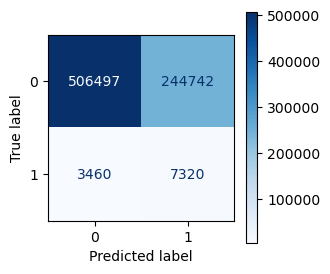

In [314]:
predicted_test_gnb = gnb.predict(X_test_B_lda)
ans_test_gnb = evaluate_model(target_test_df,predicted_test_gnb)
print(ans_test_gnb)

## LogisticRegression

{'recall_0': 0.5671337616923509, 'recall_1': 0.7435992578849722, 'accuracy': 0.5696301535788477}


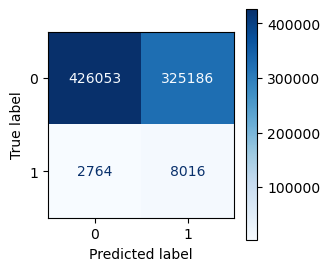

In [315]:
predicted_test_clf = clf.predict(X_test_B_lda)
ans_test_clf = evaluate_model(target_test_df,predicted_test_clf)
print(ans_test_clf)

## Decision Tree

{'recall_0': 0.5261161893884636, 'recall_1': 0.6527829313543599, 'accuracy': 0.527908096779739}


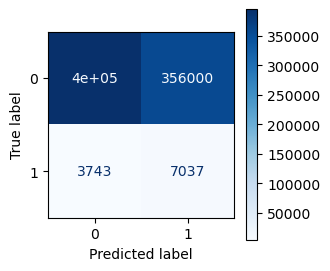

In [316]:
predicted_test_dtree = dtree.predict(X_test_B_lda)
ans_test_dtree = evaluate_model(target_test_df,predicted_test_dtree)
print(ans_test_dtree)

## XGBoost

{'recall_0': 0.5261161893884636, 'recall_1': 0.6527829313543599, 'accuracy': 0.527908096779739}


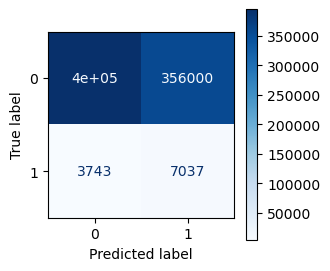

In [317]:
predicted_test_xgb_cl = dtree.predict(X_test_B_lda)
ans_test_xgb_cl = evaluate_model(target_test_df,predicted_test_xgb_cl)
print(ans_test_xgb_cl)

## AdaBoost

{'recall_0': 0.6514092053261346, 'recall_1': 0.6829313543599258, 'accuracy': 0.6518551374703255}


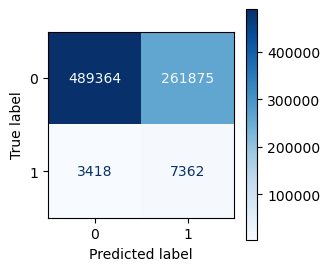

In [318]:
predicted_test_ab = model_ada.predict(X_test_B_lda)
ans_test_ab = evaluate_model(target_test_df,predicted_test_ab)
print(ans_test_ab)

## Random Forest

{'recall_0': 0.5179510115955109, 'recall_1': 0.6595547309833024, 'accuracy': 0.5199542268631097}


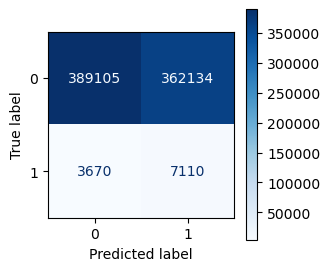

In [319]:
predicted_test_rf = model.predict(X_test_B_lda)
ans_test_rf = evaluate_model(target_test_df,predicted_test_rf)
print(ans_test_rf)

## Summary of Test Data
###  Logistic Regression is giving good recall for sepsis true but Gaussian model is giving good recall for both sepsis true and false and accuracy is also better than other models 


## Comparing all the models logistic model is a better fit for predicting sepsis true